In [1]:
# %load basic_imports.py
from scipy import *
from qutip import *
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Lib.Parametrs import *
import Lib.Bloch_sphere as bloch

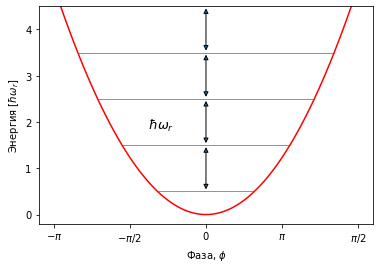

In [3]:
#hamiltonian of harmonic oscillator

Ec = 1.
El = 1.
n = 0.
phi = np.linspace(-np.pi, np.pi, 100)

Hh = 4*Ec*n**2 + El*phi**2/2
def phit(h):
    phit = np.sqrt(2*h/El)
    return phit


fig = plt.figure()
n = 3
#plt.rcParams['figure.figsize'] = [n, n]
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel(r'Энергия [$\hbar \omega_{r}$]')
ax.set_xlabel('Фаза, $\phi$')
plt.ylim(-0.2,4.5)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi, np.pi/2], ['$-\pi$', '$-\pi$/2' , '0', '$\pi$/2', '$\pi$'])


ax.hlines(1-0.5, -phit(1-0.5), phit(1-0.5), 'r', linewidth = 0.6)
ax.hlines(2-0.5, -phit(2-0.5), phit(2-0.5), 'r', linewidth = 0.6)
ax.hlines(3-0.5, -phit(3-0.5), phit(3-0.5), 'r', linewidth = 0.6)
ax.hlines(4-0.5, -phit(4-0.5), phit(4-0.5), 'r', linewidth = 0.6)


ax.annotate("", xy=(0, 1+0.5), xytext=(0, 0+0.5), arrowprops=dict(arrowstyle="<|-|>"))
ax.annotate("", xy=(0, 2+0.5), xytext=(0, 1+0.5), arrowprops=dict(arrowstyle="<|-|>"))
ax.annotate("", xy=(0, 3+0.5), xytext=(0, 2+0.5), arrowprops=dict(arrowstyle="<|-|>"))
ax.annotate("", xy=(0, 4+0.5), xytext=(0, 3+0.5), arrowprops=dict(arrowstyle="<|-|>"))

plt.text(-1.2, 1.35+0.5, r'$\hbar \omega_{r}$', fontsize=13)

plt.plot(phi,Hh, 'r')
plt.show()

In [31]:
OmegaQ = 1.
OmegaR = 1.
OmegaD = 1.

#initial hamiltonian
def Hq(Omega):
    Hq = OmegaQ * sigmaz()/2
    return Hq
    
def He(OmegaR):
    He = OmegaR * sigmax()/2
    return He
    
def Hi(Amp, OmegaD, phi): 
    Hi = Amp * np.cos(OmegaD*t+phi) * sigmaz()/2
    return Hi
    
#hamiltonian after RWA

def H_RWA(OmegaQ, OmegaD):
    delta = OmegaQ - OmegaD
    H_RWA = delta * sigmaz()/2 + OmegaR * sigmax()/2
    return H_RWA

def H_inf():
    phi = 0
    A = 1
    H_inf = A/2*(sigmax()*np.cos(phi)-1j*sigmay()*np.sin(phi))
    return H_inf

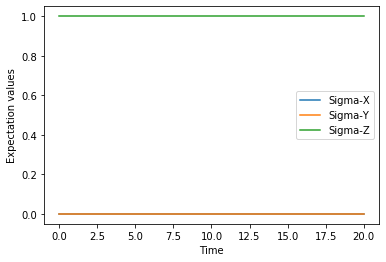

Result object with mesolve data.
--------------------------------
expect = True
num_expect = 3, num_collapse = 0


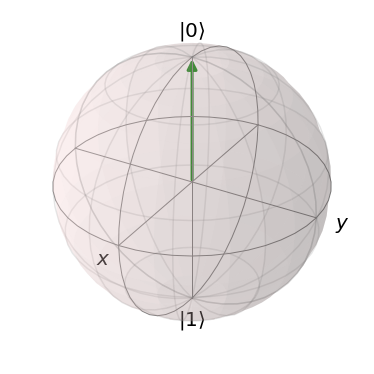

In [51]:
#evolution parametrs

#duration
times = np.linspace(0.0, 20.0, 100)
#initial state: the state vector or density matrix (`rho0`) 
r = [0, 0, 1]
rho = bloch.convert.r_to_rho(r)
b = Bloch()
b.add_vectors(r)


psi0 = rho
result = mesolve(Hq(1), psi0, times, [], [sigmax() ,sigmay(), sigmaz()])

fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
ax.plot(result.times, result.expect[2])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend(("Sigma-X", "Sigma-Y", "Sigma-Z"))
plt.show()


print(result)
b.show()

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form),

$H = \hbar \omega_{c}a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^{\dagger} + a)(\sigma_{-} + \sigma_{+})$

or with the rotating-wave approximation,

$H_{\rm RWA} = \hbar \omega_{c} a^{\dagger} a + \frac{1}{2}\hbar\omega_{a}\sigma_{z} + \hbar g(a^\dagger \sigma_{-} + a\sigma_{+})$,

where $\omega_{c}$ and $\omega_{a}$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength."

In [6]:
# defining hamiltonian through a and a.dag()

wc = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency
g  = 0.05 * 2 * pi  # coupling strength
kappa = 0.005       # cavity dissipation rate
gamma = 0.05        # atom dissipation rate
N = 4         # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,100,101)

# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())



TypeError: 'module' object is not callable

In [9]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)
    
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

NameError: name 'a' is not defined

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

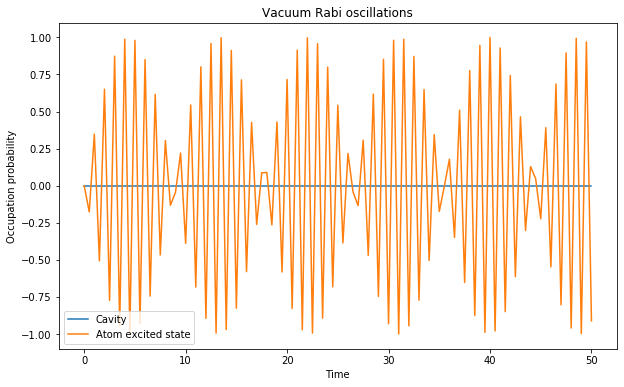

In [8]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')

Text(0.5, 1.0, 'Vacuum Rabi oscillations')

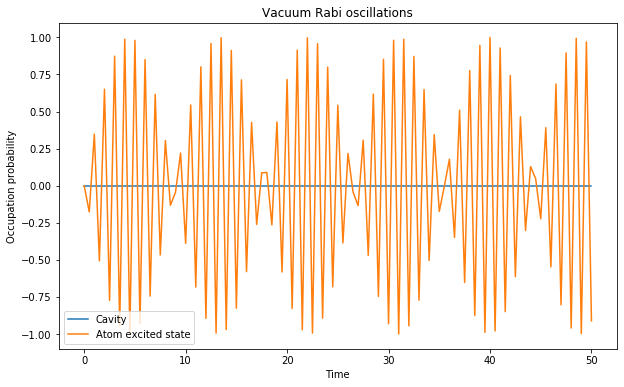

In [7]:
phi = 0
A = 170
H = A/2*(sigmax()*np.cos(phi)-1j*sigmay()*np.sin(phi))

N = 15
psi0 =  basis(2,1)
tlist = np.linspace(0,50,101)
output = mesolve(H, psi0, tlist, [], [sigmax(), sigmay()])

n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vacuum Rabi oscillations')